<a href="https://colab.research.google.com/github/YuliethRojas/TalentoTech/blob/Actividades/An%C3%A1lisis_sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=0e01d7b5900edd0f94a27be9e169e0151f2f2f7479703d80b6d18438031c3656
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
 

In [2]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [3]:
def translate_text(strcomment:str):
    translator = Translator()
    translated_text = translator.translate(strcomment, src='es', dest='en')
    return translated_text.text

In [4]:
def getpolarity(strcomment:str):
    strcomment = translate_text(strcomment)
    analysis = TextBlob(strcomment)
    polarity = analysis.sentiment.polarity
    return polarity
#

In [27]:
corpus=pd.read_csv("/content/drive/MyDrive/BD Yulieth/Comentarios.csv")

In [28]:
display(corpus)

,Comentario
0,La comida fue excelente y el servicio fue exce...
1,El ambiente era agradable y la comida estaba d...
2,"La comida estaba bien, pero el servicio fue le..."
3,"No me gustó la comida, estaba fría y el sabor ..."
4,El peor restaurante en el que he estado. No lo...
...,...
66,Siempre disfruto venir aquí. La comida es deli...
67,"Buen lugar para cenar, aunque el servicio pued..."
68,"La comida está bien, pero el ambiente no es mu..."
69,No me gustó la comida y el servicio fue muy de...


In [8]:
translate_text(corpus.iloc[0,0])

'The food was excellent and the service was exceptional. I will definitely return.'

In [19]:
corpus['Polaridad']=corpus['Comentario'].apply(getpolarity)

In [ ]:
positivos = corpus[corpus['Polaridad'] > 0].shape[0]
negativos = corpus[corpus['Polaridad'] < 0].shape[0]
neutros = corpus[corpus['Polaridad'] == 0].shape[0]

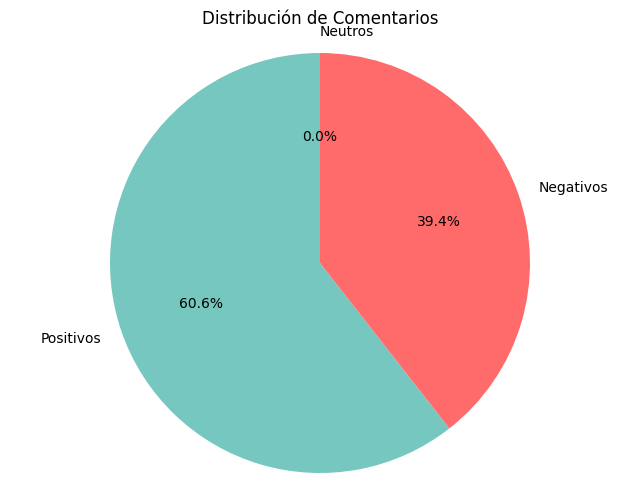

In [66]:
labels = ['Positivos', 'Negativos', 'Neutros']
sizes = [positivos, negativos, neutros]
colors = ['#76c7c0', '#ff6b6b', '#f4f4f4']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Comentarios')
plt.axis('equal')
plt.show()

In [31]:
import re
from nltk.tokenize.api import TokenizerI
from nltk.tokenize import ToktokTokenizer

In [55]:
stopwords = ['de','el','la','los','La','las','es','y','El','este','un','estaba','que','pero','fue','en','No','no','muy','Un']

In [33]:
def remove_stopwords(text):
        return ' '.join(word for word in text.split() if word not in stopwords)


In [56]:
corpus['Comentario'] = corpus['Comentario'].apply(remove_stopwords)

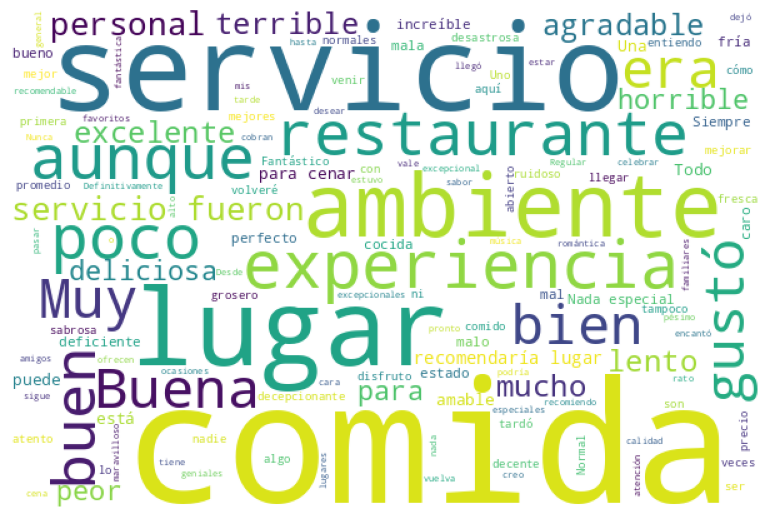

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in corpus.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [58]:
from collections import Counter

# Contar las frecuencias de las palabras restantes
words = ' '.join(corpus['Comentario']).split()
word_counts = Counter(words)  # Contar la frecuencia de cada palabra

word_counts_df = pd.DataFrame(word_counts.items(), columns=['Palabra', 'Frecuencia'])
word_counts_df = word_counts_df.sort_values(by='Frecuencia', ascending=False)  # Ordenar por frecuencia

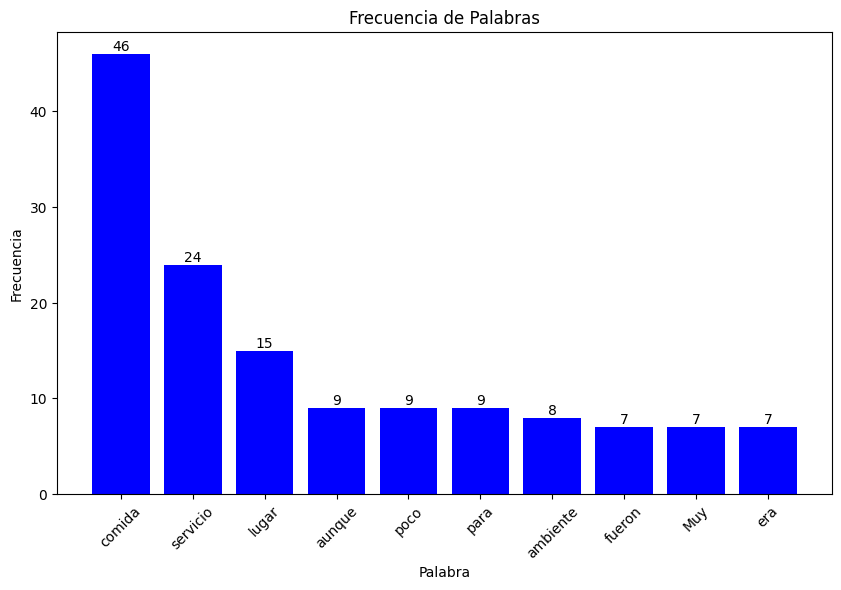

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(word_counts_df['Palabra'][:10], word_counts_df['Frecuencia'][:10], color='blue')
bars = plt.bar(word_counts_df['Palabra'][:10], word_counts_df['Frecuencia'][:10], color='blue')  # Mostrar solo las 10 palabras más frecuentes
plt.title('Frecuencia de Palabras')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.bar_label(bars)
plt.show()